In [1]:
import pandas as pd
import numpy as np

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("./UDEMY_TSA_FINAL/Data/RestaurantVisitors.csv",index_col="date",parse_dates=True)
df.index.freq="D"

In [5]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [6]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [7]:
df1=df.dropna()
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [8]:
#xhange the dtype of selected columns
cols=["rest1","rest2","rest3","rest4","total"]

for col in cols:
    df1[col]=df1[col].astype(int)
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


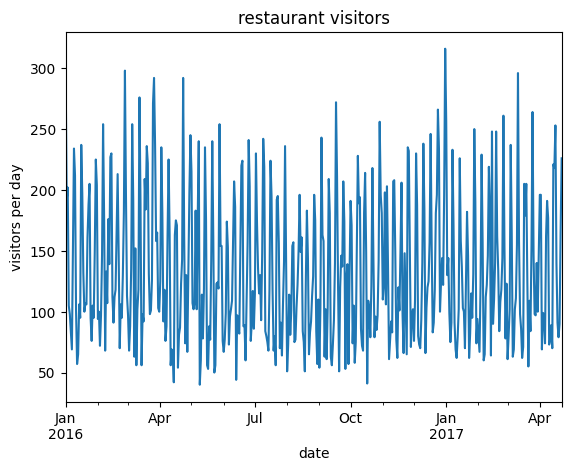

In [10]:
# plotting the source data
df1["total"].plot(title="restaurant visitors",ylabel="visitors per day");

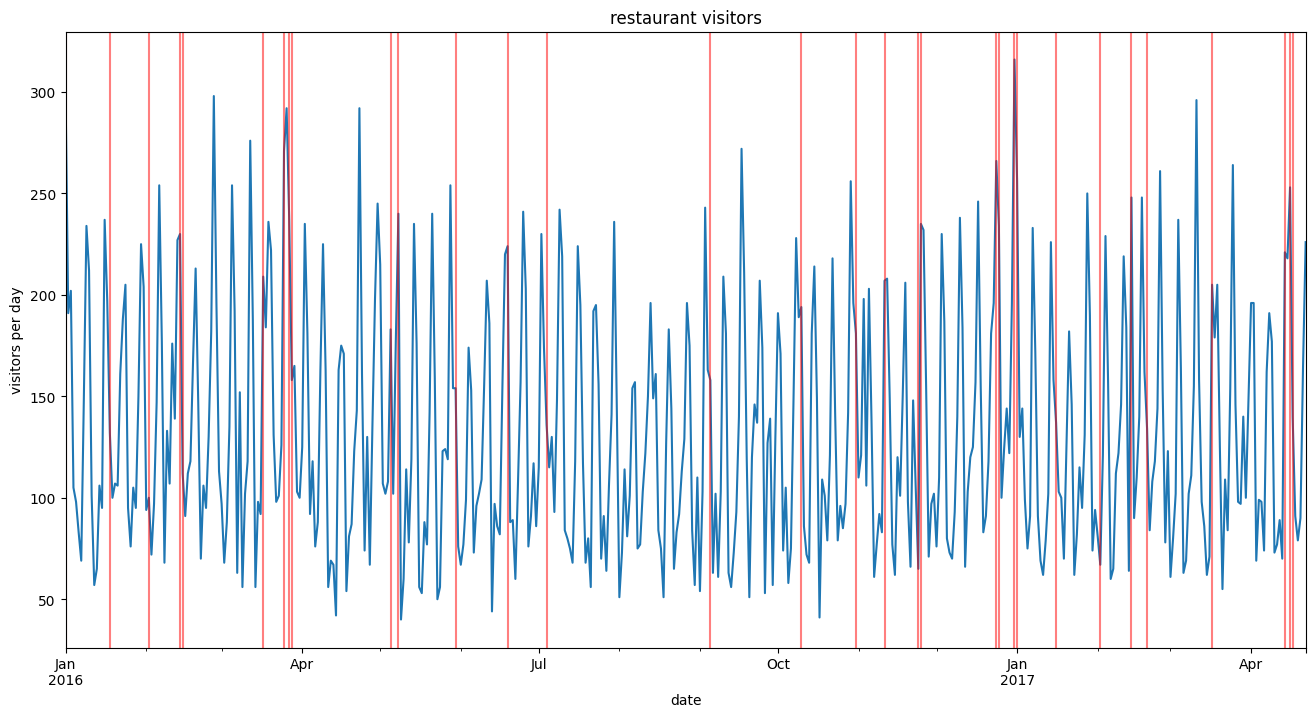

In [20]:
#checking the holidays
ax=df1["total"].plot(figsize=(16,8),title="restaurant visitors",ylabel="visitors per day");
for x in df1.query("holiday==1").index:
    ax.axvline(x=x,color="r",alpha=0.5)

#### ETS composition

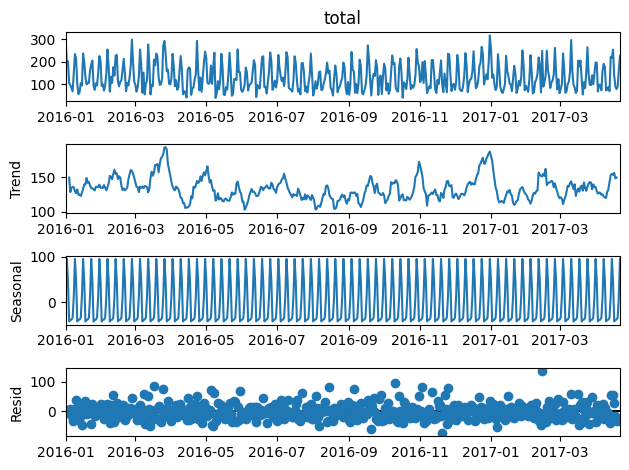

In [21]:
result= seasonal_decompose(df1["total"])
result.plot();

In [24]:
# stationary test
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [25]:
adf_test(df1["total"])

Augmented Dickey-Fuller Test: 
ADF test statistic       -5.592497
p-value                   0.000001
# lags used              18.000000
# observations          459.000000
critical value (1%)      -3.444677
critical value (5%)      -2.867857
critical value (10%)     -2.570135
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


#### auto_arima

In [26]:
# for sarima orders we set seasonal True
auto_arima(df1["total"],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2384.133
Date:                   Wed, 19 Jul 2023   AIC                           4776.267
Time:                           13:34:21   BIC                           4792.945
Sample:                       01-01-2016   HQIC                          4782.824
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.4421      1.822      2.986      0.003       1.870       9.014
ar.S.L7        0.9596      0.013     71.796      0.000       0.933       0.986
ma.S.L7       -0.7386      0.050    -14.634      0.000      -0.838      -0.640
sigma2      1237.8918     74.072     16.712      0.000    1092.713    1383.071
===================================================================================
Ljung-Box (L1) (Q):                  15.96   Jarque-Bera (JB):                58.83
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.72
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### splitting data train/test

In [27]:
len(df1)

478

In [28]:
#setting 6 weeks for testing 

train=df1.iloc[:436]
test=df1.iloc[436:]

#### SARIMA 1,0,0 2,0,0,7 model

In [33]:
model=SARIMAX(train["total"],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Wed, 19 Jul 2023   AIC                           4457.403
Time:                                   13:45:04   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                29.23
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
#obtain predicted vals
start=len(train)
end=len(train)+len(test)-1
predictions=results.predict(start=start,end=end,dynamic=False).rename('SARIMA(1,0,0)(2,0,0,7) Predictions')

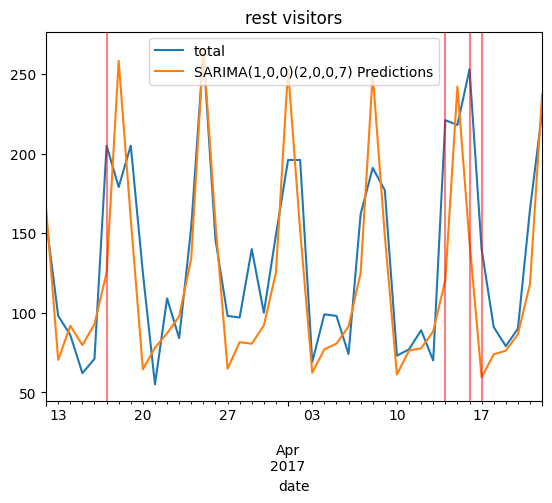

In [37]:
ax=test["total"].plot(legend=True,title="rest visitors")
predictions.plot(legend=True)

#check if there is any holiday
for x in test.query("holiday==1").index:
    ax.axvline(x=x,color="r",alpha=0.5)

#### Evaluate model

In [40]:
from statsmodels.tools.eval_measures import mse, rmse

error1=mse(test["total"],predictions)
error2=rmse(test["total"],predictions)

print(f'SARIMA(1,0,0)(2,0,0,7) MSE Error: {error1}')
print(f'SARIMA(1,0,0)(2,0,0,7) RMSE Error: {error2}')

SARIMA(1,0,0)(2,0,0,7) MSE Error: 1702.6479557292998
SARIMA(1,0,0)(2,0,0,7) RMSE Error: 41.263154941537124


## Adding EXOG TERM, variable to prediction

In [41]:
model=SARIMAX(train["total"],exog=train["holiday"],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2158.482
Date:                           Wed, 19 Jul 2023   AIC                           4326.963
Time:                                   15:02:56   BIC                           4347.352
Sample:                               01-01-2016   HQIC                          4335.010
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       66.8897      4.241     15.774      0.000      58.578      75.201
ar.L1          0.2145      0.049      4.375      0.000       0.118       0.311
ar.S.L7        0.5147      0.042     12.312      0.000       0.433       0.597
ar.S.L14       0.4575      0.042     10.997      0.000       0.376       0.539
sigma2      1117.3976     73.302     15.244      0.000     973.729    1261.066
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.68   Prob(JB):                         0.54
Heteroskedasticity (H):               0.91   Skew:                             0.11
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
#pred vals
start=len(train)
end=len(train)+len(test)-1
exog_forecast=test[['holiday']]
predictions=results.predict(start=start,end=end,exog=exog_forecast).rename('SARIMAX(1,0,0)(2,0,0,7) Predictions')

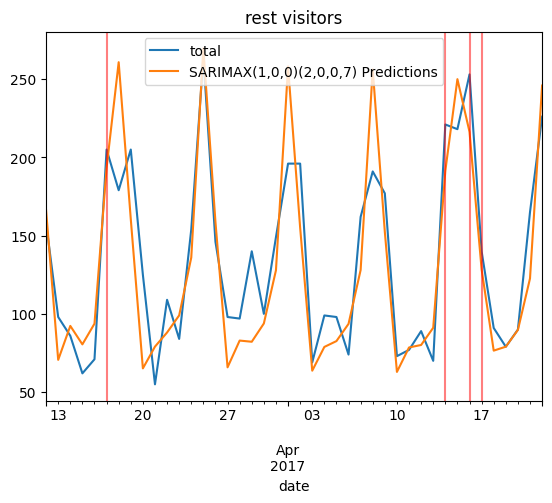

In [49]:
ax=test["total"].plot(title="rest visitors",legend=True);
predictions.plot(legend=True)
for x in test.query("holiday==1").index:
    ax.axvline(x=x,color="r",alpha=0.5)

### Evaluate the model

In [52]:
# Print values from SARIMA above
print(f'SARIMA(1,0,0)(2,0,0,7) MSE Error: {error1}')
print(f'SARIMA(1,0,0)(2,0,0,7) RMSE Error: {error2}')
print()

error1x = mse(test['total'], predictions)
error2x = rmse(test['total'], predictions)

# Print new SARIMAX values
print(f'SARIMAX(1,0,0)(2,0,0,7) with EXOG term  MSE Error: {error1x}')
print(f'SARIMAX(1,0,0)(2,0,0,7) with EXOG term RMSE Error: {error2x}')

SARIMA(1,0,0)(2,0,0,7) MSE Error: 1702.6479557292998
SARIMA(1,0,0)(2,0,0,7) RMSE Error: 41.263154941537124

SARIMAX(1,0,0)(2,0,0,7) with EXOG term  MSE Error: 950.6659339972275
SARIMAX(1,0,0)(2,0,0,7) with EXOG term RMSE Error: 30.832870998290566


## Forecast using EXOG Term

In [57]:
model=SARIMAX(df1["total"],exog=df1["holiday"],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)


In [58]:
results=model.fit()
exog_forecast=df[478:][["holiday"]]
fcast=results.predict(len(df1),len(df1)+38,exog=exog_forecast).rename('SARIMAX(1,0,0)(2,0,0,7) Forecast')

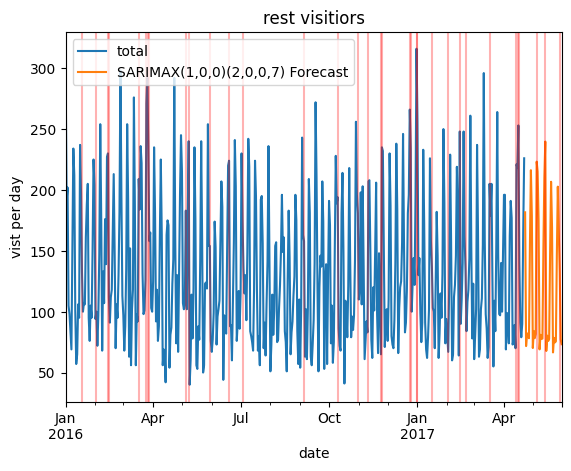

In [60]:
ax=df1["total"].plot(title="rest visitiors",legend=True,ylabel="vist per day")
fcast.plot(legend=True)
for x in df.query("holiday==1").index:
    ax.axvline(x=x,color="r",alpha=0.3)
